In [1]:
%reset -fs

In [2]:
import pandas as pd
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
diamond_df = pd.read_csv('diamonds.csv', index_col=0)

In [4]:
diamond_df = diamond_df.head(600)

In [5]:
diamond_df.shape

(600, 10)

In [6]:
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
diamond_df.cut.value_counts()

Ideal        191
Premium      176
Very Good    144
Good          59
Fair          30
Name: cut, dtype: int64

In [9]:
# Encode the ordinal categorical variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond_df.cut = diamond_df.cut.map(cut_mapping)

In [10]:
diamond_df.color.value_counts()

E    152
F    127
G     83
H     81
D     73
I     58
J     26
Name: color, dtype: int64

In [11]:
# Encoding the ordinal categorical variable 'color'
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df.color = diamond_df.color.map(color_mapping)

In [12]:
diamond_df.clarity.value_counts()

SI1     186
VS2     140
VS1      94
SI2      88
VVS1     36
VVS2     34
I1       14
IF        8
Name: clarity, dtype: int64

In [13]:
# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df.clarity = diamond_df.clarity.map(clarity_mapping)

In [14]:
diamond_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000
mean,0.655383,2.731667,3.625000,2.830000,61.721500,57.76400,2332.816667,5.496817,5.492867,3.390900
std,0.206460,1.154073,1.686945,1.489339,1.665426,2.40217,936.366558,0.686015,0.673529,0.425306
min,0.200000,0.000000,0.000000,0.000000,53.100000,52.00000,326.000000,3.790000,3.750000,2.270000
25%,0.610000,2.000000,2.000000,2.000000,60.900000,56.00000,2762.000000,5.477500,5.502500,3.365000
50%,0.710000,3.000000,4.000000,3.000000,61.800000,57.00000,2792.500000,5.740000,5.730000,3.540000
75%,0.760000,4.000000,5.000000,4.000000,62.700000,59.00000,2816.000000,5.872500,5.870000,3.620000
max,1.200000,4.000000,6.000000,7.000000,68.100000,70.00000,2838.000000,6.900000,6.900000,4.330000


In [15]:
diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

In [16]:
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

In [17]:
model_df = diamond_df.copy()

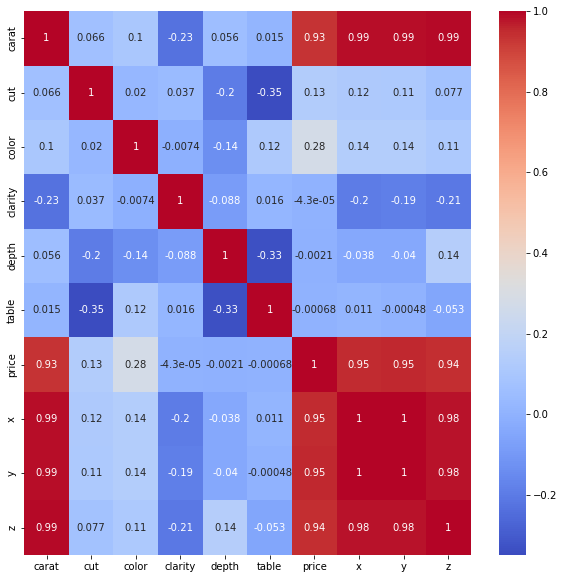

In [18]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(model_df.corr(), annot=True, cmap='coolwarm');

In [19]:
X = model_df.drop(['price'], axis=1)
y = model_df['price']

In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [22]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

In [23]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

In [24]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [25]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.998287907477189
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 1.0}


In [26]:
xgb_cv = (xgb_grid.best_estimator_)

In [27]:
eval_set = [(X_train, y_train),
            (X_val, y_val)]

In [28]:
fit_model = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=False)

C:\Users\Reda Ibrahim\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Reda Ibrahim\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [29]:
print("MAE:", mean_absolute_error(y_val, fit_model.predict(X_val)))
print("MSE:", mean_squared_error(y_val, fit_model.predict(X_val)))
print("R2:", r2_score(y_val, fit_model.predict(X_val)))

MAE: 29.10306910464638
MSE: 1375.8155789499808
R2: 0.9987197232524212


In [30]:
print("MAE:", mean_absolute_error(y_test, fit_model.predict(X_test)))
print("MSE:", mean_squared_error(y_test, fit_model.predict(X_test)))
print("R2:", r2_score(y_test, fit_model.predict(X_test)))

MAE: 30.513876128614996
MSE: 1551.9601799029808
R2: 0.9982410411853999


In [31]:
fit_model.save_model('xgb_model.json')

In [32]:
from pyngrok import ngrok
ngrok.kill()

NGROK_AUTH_TOKEN="27peAqIGJrYB0ZqjiR28bPyVIwg_3zQrJDftdDDWG17u8TUkC"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [33]:
ngrok.connect(8501)

<NgrokTunnel: "http://9b40-196-132-6-137.ngrok.io" -> "http://localhost:8501">

In [34]:

%%writefile app.py

# Here, we’ve loaded up our model from the JSON file and told Streamlit to cache it for quick access



import xgboost as xgb
import streamlit as st
import pandas as pd

#Loading up the Regression model we created
model = xgb.XGBRegressor()
model.load_model('xgb_model.json')

#Caching the model for faster loading
@st.cache


# we’ll define a function that takes in our users’ input (diamond characteristics), and outputs a price prediction
    



def predict(carat, cut, color, clarity, depth, table, x, y, z):
    #Predicting the price of the carat
    if cut == 'Fair':
        cut = 0
    elif cut == 'Good':
        cut = 1
    elif cut == 'Very Good':
        cut = 2
    elif cut == 'Premium':
        cut = 3
    elif cut == 'Ideal':
        cut = 4

    if color == 'J':
        color = 0
    elif color == 'I':
        color = 1
    elif color == 'H':
        color = 2
    elif color == 'G':
        color = 3
    elif color == 'F':
        color = 4
    elif color == 'E':
        color = 5
    elif color == 'D':
        color = 6
    
    if clarity == 'I1':
        clarity = 0
    elif clarity == 'SI2':
        clarity = 1
    elif clarity == 'SI1':
        clarity = 2
    elif clarity == 'VS2':
        clarity = 3
    elif clarity == 'VS1':
        clarity = 4
    elif clarity == 'VVS2':
        clarity = 5
    elif clarity == 'VVS1':
        clarity = 6
    elif clarity == 'IF':
        clarity = 7
    

    prediction = model.predict(pd.DataFrame([[carat, cut, color, clarity, depth, table, x, y, z]], columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']))
    return prediction




#With our prediction function defined, we need to create the app itself, and areas for user inputs. Let’s start with the app



st.title('Diamond Price Predictor')
st.image('1326308.jpg')
st.header('Enter the characteristics of the diamond:')



#define user input
carat = st.number_input('Carat Weight:', min_value=0.1, max_value=10.0, value=1.0)

cut = st.selectbox('Cut Rating:', ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

color = st.selectbox('Color Rating:', ['J', 'I', 'H', 'G', 'F', 'E', 'D'])

clarity = st.selectbox('Clarity Rating:', ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

depth = st.number_input('Diamond Depth Percentage:', min_value=0.1, max_value=100.0, value=1.0)

table = st.number_input('Diamond Table Percentage:', min_value=0.1, max_value=100.0, value=1.0)

x = st.number_input('Diamond Length (X) in mm:', min_value=0.1, max_value=100.0, value=1.0)

y = st.number_input('Diamond Width (Y) in mm:', min_value=0.1, max_value=100.0, value=1.0)

z = st.number_input('Diamond Height (Z) in mm:', min_value=0.1, max_value=100.0, value=1.0)






# input that calls our prediction function

if st.button('Predict Price'):
    price = predict(carat, cut, color, clarity, depth, table, x, y, z)
    st.success(f'The predicted price of the diamond is ${price[0]:.2f} USD')


Overwriting app.py


In [ ]:
!streamlit run app.py

In [ ]:
ngrok.kill()